In [ ]:
import pandas as pd
import spacy
import matplotlib.pyplot as plt

# Function to stem and lemmatize sentences
def stem_and_lemmatize_sentences(sentences):
    # Load spaCy English model
    nlp = spacy.load("en_core_web_sm")

    # Create an empty DataFrame to store the results
    result_df = pd.DataFrame(columns=['Original', 'Lemmatized', 'Stemmed'])

    # Process each sentence in the dataset
    for sentence in sentences:
        # Process the sentence with spaCy
        doc = nlp(sentence)

        # Initialize lists to store results for each sentence
        original_words = [token.text for token in doc]
        lemmatized_words = [token.lemma_ for token in doc]
        stemmed_words = [token.lemma_.lower() for token in doc]

        # Append results to the DataFrame
        sentence_df = pd.DataFrame({'Original': original_words, 'Lemmatized': lemmatized_words, 'Stemmed': stemmed_words})
        result_df = pd.concat([result_df, sentence_df], ignore_index=True)

    return result_df

# Example usage with a DataFrame
data = {
    'Sentences': [
        "I am running in the park and playing with my friends.",
        "The quick brown foxes are jumping over the lazy dogs.",
        "She sells seashells by the seashore."
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Apply the stem_and_lemmatize_sentences function to the 'Sentences' column
result_df = stem_and_lemmatize_sentences(df['Sentences'])

# Concatenate all words in the 'Lemmatized' column
all_words = ' '.join(result_df['Lemmatized'])


In [ ]:
df.head(10)

,Sentences
0,I am running in the park and playing with my f...
1,The quick brown foxes are jumping over the laz...
2,She sells seashells by the seashore.


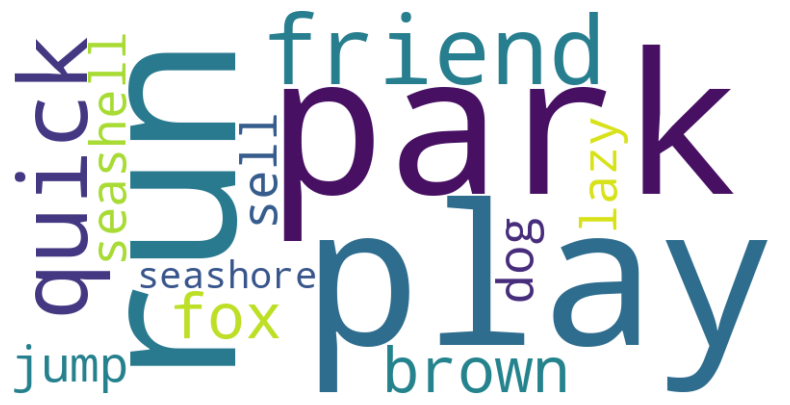

In [ ]:
from wordcloud import WordCloud

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
import nltk
import pandas as pd
from nltk.corpus import movie_reviews

nltk.download("movie_reviews")

# Load sentences from the IMDB Movie Reviews dataset
positive_reviews = [' '.join(movie_reviews.words(fileid)) for fileid in movie_reviews.fileids('pos')]
negative_reviews = [' '.join(movie_reviews.words(fileid)) for fileid in movie_reviews.fileids('neg')]

# Combine positive and negative reviews
all_reviews = positive_reviews + negative_reviews

# Create a DataFrame
df = pd.DataFrame({'Sentences': all_reviews, 'Sentiment': ['positive']*len(positive_reviews) + ['negative']*len(negative_reviews)})


[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


In [ ]:
df.head(10)

,Sentences,Sentiment
0,films adapted from comic books have had plenty...,positive
1,every now and then a movie comes along from a ...,positive
2,you ' ve got mail works alot better than it de...,positive
3,""" jaws "" is a rare film that grabs your attent...",positive
4,moviemaking is a lot like being the general ma...,positive
5,"on june 30 , 1960 , a self - taught , idealist...",positive
6,"apparently , director tony kaye had a major ba...",positive
7,one of my colleagues was surprised when i told...,positive
8,"after bloody clashes and independence won , lu...",positive
9,the american action film has been slowly drown...,positive


In [ ]:
# Apply the stem_and_lemmatize_sentences function to the 'Sentences' column
result_df = stem_and_lemmatize_sentences(df['Sentences'])

# Concatenate all words in the 'Lemmatized' column
all_words = ' '.join(result_df['Lemmatized'])

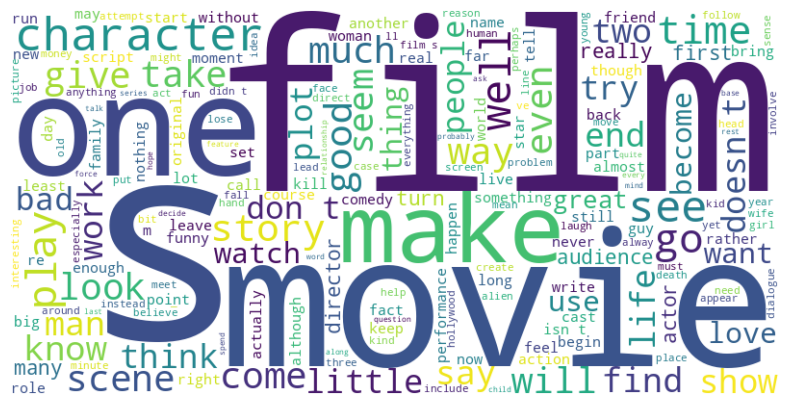

In [ ]:
from wordcloud import WordCloud

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()